[![Abrir en Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ManuelEspejo/Machine-Learning-Bases/blob/main/notebooks/03_Aprendizaje-Por-Refuerzo.ipynb) 👈🏻​ **Pulsar para abrir en Colab​**

# ¿Cómo usar estos notebooks?

Si este es el primer notebook que abres en este repositorio, te recomiendo que antes leas el [Manual de uso de estos notebooks](https://github.com/ManuelEspejo/Machine-Learning-Bases/blob/main/docs/manual-notebooks.md) que he creado para que te familiarices con el proyecto y las distintas rutas que puedes seguir, luego puedes volver aquí y continuar.

En este notebook, vamos a profundizar en el aprendizaje por refuerzo.

Por otra parte, si aún no has revisado el notebook "[00_Empieza-aquí.ipynb](https://github.com/ManuelEspejo/Machine-Learning-Bases/blob/main/notebooks/00_Empieza-aquí.ipynb)", te sugiero que le eches un vistazo primero para conocer los conceptos básicos. Pero si ya tienes una idea clara de qué es el aprendizaje no supervisado y quieres verlo en acción, ¡estás en el lugar correcto!

# 03. Aprendizaje por Refuerzo

El Aprendizaje por Refuerzo (Reinforcement Learning, RL) es un tipo de Machine Learning donde el modelo (llamado **agente**) aprende a través de la experiencia en un entorno, intentando maximizar una recompensa acumulada a lo largo del tiempo.

## ¿Por qué es importante?

El RL es fundamental en la inteligencia artificial moderna porque nos permite resolver problemas en los que las decisiones se deben tomar secuencialmente y las consecuencias de una acción afectan el futuro. Algunos de los avances más emocionantes en IA han sido gracias al aprendizaje por refuerzo:

- **Inteligencias artificiales campeonas en juegos:** Desde el mítico [AlphaGo](https://en.wikipedia.org/wiki/AlphaGo) que venció a los mejores jugadores de Go, hasta bots que dominan videojuegos como [Dota 2](https://arxiv.org/abs/1912.06680) o [StarCraft](https://deepmind.google/discover/blog/alphastar-grandmaster-level-in-starcraft-ii-using-multi-agent-reinforcement-learning/).
- **Robótica avanzada:** Robots que aprenden a caminar, volar o ensamblar piezas en fábricas sin un manual de instrucciones.
- **Toma de decisiones autónoma:** Algoritmos que optimizan inversiones, rutas de transporte o sistemas energéticos en tiempo real.
- **Ciencia y descubrimiento:** Sistemas que diseñan medicamentos, exploran galaxias o incluso controlan experimentos científicos.

En esencia, el RL se utiliza cuando necesitamos que una máquina aprende a actuar en un entorno complejo y dinámico, en el que no hay una solución clara de antemano.

## ¿Qué vamos a ver?

En este notebook, vamos a explorar el aprendizaje por refuerzo desde sus fundamentos hasta su implementación práctica. El objetivo es que puedas comprender no solo cómo funciona, sino también por qué es tan poderoso.

Al final de este notebook, entenderás:

- **Los fundamentos del RL**, incluyendo conceptos clave como agente, entorno, recompensa y política.
- **Cómo funciona un agente RL**, su interacción con el entorno y cómo aprende para maximizar una recompensa acumulada.
- **Cómo implementar un modelo RL desde cero**, aplicándolo al clásico problema de [CartPole](https://www.gymlibrary.dev/environments/classic_control/cart_pole/).
- **Cómo aplicar RL a diferentes disciplinas**, como negocios, videojuegos, robótica y más.

**¿Listo para empezar a explorar el fascinante mundo del aprendizaje por refuerzo?**

**¡Empecemos!🚀**

# Índice de Contenidos

```{table} Índice
1. Fundamentos del Aprendizaje por Refuerzo
   1.1. Componentes clave del RL  
      1.1.1. Agente, entorno y recompensa  
      1.1.2. Política, función de valor y función Q  
   1.2. Exploración vs. explotación: el equilibrio perfecto  
2. Tabular Q-Learning: Un primer paso práctico
   2.1. Descripción del problema: un agente en una cuadrícula  
   2.2. Configuración del entorno  
   2.3. Implementación del algoritmo Tabular Q-Learning  
      2.3.1. Inicialización de la tabla Q  
      2.3.2. Actualización de valores Q   
   2.4. Visualización del aprendizaje del agente
3. OpenAI Gym y el problema de CartPole
   3.1. Introducción a OpenAI Gym  
   3.2. Configuración del entorno CartPole  
   3.3. Implementación de Q-Learning en CartPole  
      3.3.1. Entrenamiento del agente  
      3.3.2. Visualización del progreso del agente  
   3.4. Análisis de resultados y reflexiones  
4. Casos de Uso y Reflexión Final
   4.1. Aplicaciones reales del RL  
      4.1.1. Negocios y marketing  
      4.1.2. Robótica  
      4.1.3. Videojuegos  
   4.2. Reflexión sobre las limitaciones y futuro del RL  
   4.3. Conclusión y próximos pasos
```


In [22]:
# Importaciones

import numpy as np
import os
import sys
import gymnasium as gym
from IPython import display # noqa: E402
import PIL.Image
import matplotlib.pyplot as plt

In [23]:
# Configuraciones
# Detectar si estamos en Colab
in_colab = 'google.colab' in str(get_ipython())

if in_colab:
    # Descargar el archivo visualizations.py desde el repositorio de GitHub
    !mkdir -p /content/utils # Creamos una carpeta utils para que coincida con la estructura del repositorio
    !wget -O utils/visualizations.py "https://raw.githubusercontent.com/ManuelEspejo/Machine-Learning-Bases/main/utils/visualizations.py"
    data_dir = '/content/data' # Ruta de los datos
else:
    # Agregar el directorio raíz al path de Python (Para ejecutar en local)
    notebook_dir = os.path.dirname(os.path.abspath('__file__'))
    project_dir = os.path.dirname(notebook_dir)
    sys.path.append(project_dir)
    data_dir = '../data/raw'

In [24]:
from utils.visualizations import *  # noqa: F403

## 1.1. Componentes clave del RL

En este apartado, vamos a desglosar los componentes clave del RL para entender bien cómo podemos aplicarlos a nuestros problemas.

### 1.1.1. Agente, entorno y recompensa

En el corazón del RL, tenemos tres actores principales:

#### 🧑‍🚀 Agente

El agente es el protagonista de nuestra historia. Es la entidad que toma decisiones, explora el mundo y aprende de sus errores. En un videojuego, el agente sería tu personaje controlado. En un robot, el agente sería el sistema que decide cómo moverse.

- **Pregunta clave que se hace el agente**: ¿Qué acción debo tomar ahora?

#### 🌍 Entorno

El entorno es el mundo donde el agente vive y actúa. Define las reglas del juego y las consecuencias de cada acción. Es como el tablero de un juego de mesa: puede ser un simple tablero 2D o un mundo complejo como el universo de Minecraft.

- **Pregunta clave que se hace el agente**: ¿Cómo responde el mundo a mis acciones?

#### 🏆 Recompensa

La recompensa es el "premio" que el agente obtiene después de tomar una acción en el entorno. Es lo que lo motiva a actuar de cierta manera. En un videojuego, la recompensa podría ser un punto extra por recoger una moneda. En un agente de bolsa,la recompensa podría ser la ganancia neta después de una transacción.

- **Pregunta clave que se hace el agente**: ¿Fue buena mi acción?

Las recompensas son lo que determinan cómo el agente ajusta su comportamiento con el tiempo. El agente básicamente vive para maximizar sus recompensas acumuladas, es su propósito vital. Según la situación, podemos encontrar los siguientes escenarios de recompensa:

- **Recompensa positiva**: La acción tomada fue buena. El agente recibe un premio.
  - *Ejemplo*: Un dron recibe +1 por cada segundo que se mantiene volando hacia el objetivo.

- **Recompensa negativa**: La acción tomada fue mala. El agente recibe una penalización.
  - *Ejemplo*: Si el dron choca contra una pared, recibe una penalización de -10.

- **Recompensa nula**: La acción tomada no tiene consecuencias inmediatas. No es ideal, pero tampoco perjudica al agente.
  - *Ejemplo*: El dron empieza a volar en círculos sin progresar hacia el objetivo.

#### Escenarios controlados: Evitar la destruccion del mundo

Como habrás imaginado, no siempre podemos permitir que el agente practique en el mundo real. Imagina un agente aprendiendo a volar un avión a base de prueba y error. ¿Qué podría salir mal? O que un agente practicando cirugías a corazón abierto con pacientes reales. No, gracias🙂‍↔️​.

Para evitar el caos (y salvar el mundo), utilizamos simuladores de mundos controlados. Estos entornos simulan de manera segura la realidad, permitiendo que el agente practique, falle y aprende sin causar daños en el mundo real.

¡Ojo!, esto no sólo aplica a los agentes; los humanos también necesitamos simuladores o entornos controlados para practicar, especialmente en actividades complejas como la conducción o la cirugía. La diferencia es que un agente descontrolado puede tener un potencial de destrucción mucho mayor (y no se detiene a reflexionar sobre sus errores como nosotros).

### 1.1.2. Política, función de valor y función Q

Ahora que tenemos claro quién es quién, pasemos a los conceptos que guían el aprendizaje del agente:

#### 🎯 Política

La política es como el "cerebro" del agente. Define qué acción tomar en cada situación. Puede ser algo tan simple como una tabla de consulta o tan complejo como una red neuronal.

- **Ejemplo:** Si el dron está cerca de una pared, la política podría ser: "Girar a la izquierda para evitarla".

#### 💎 Función de valor

La función de valor le dice al agente qué tan bueno es estar en un estado específico. Es como si el agente tuviera un mapa que indica qué lugares son seguros y cuáles no.

- **Ejemplo:** En el caso del dron, un estado cerca de una pared podría tener un valor bajo (peligroso), mientras que un estado en el centro de la habitación tiene un valor alto (seguro).

#### 🔢 Función Q

La función Q es un nivel más avanzado: no solo evalúa los estados, sino las acciones dentro de esos estados. Es decir, ayuda al agente a decidir cuál acción específica maximizará la recompensa.

- **Ejemplo:** Si el dron está en una esquina, la función Q le diría: "Girando a la derecha tendrás una mejor recompensa que avanzando hacia adelante".


#### Analogía: En busca del tesoro

Piensa en un explorador en un bosque. La política es su instinto para decidir si gira a la izquierda o a la derecha. La función de valor es el mapa que usa para saber qué tan lejos está del tesoro. La función Q combina ambos: "Si tomo este camino, ¿qué tan rápido llegaré al tesoro?"


## 1.2. Exploración vs. explotación: el equilibrio perfecto

En el aprendizaje por refuerzo encontramos un desafío fundamental: **¿cuándo explorar y cuándo explotar?**

Para que un agente aprenda de manera eficiente, necesita encontrar el equilibrio perfecto entre estas dos estrategias:

### Exploración

La exploración consiste en probar nuevas acciones para descubrir más sobre el entorno, incluso si no garantizan una recompensa inmediata. Es como ser un aventurero que se adentra en territorios desconocidos, con la esperanza de encontrar algo valioso.

- **Ventaja**: Puede descubrir estrategias o recompensas que no eran evidentes antes.
- **Desventaja**: Puede tomar decisiones subóptimas en el corto plazo, lo que reduce las recompensas inmediatas.
- **Ejemplo**: Un robot que explora una nueva habitación podría intentar atravesar una puerta que no había detectado antes, descubriendo un camino más corto hacia su objetivo.

### Explotación

La explotación significa usar el conocimiento actual para maximizar las recompensas, eligiendo las acciones que ya sabe que funcionan. Es como ir a tu restaurante favorito y pedir ese plato que nunca te falla. ¿Por qué arriesgarse, verdad?

- **Ventaja**: Asegura recompensas constantes y predecibles.
- **Desventaja**: Limita el descubrimiento de estrategias potencialmente mejores.
- **Ejemplo**: El robot, en lugar de explorar nuevas puertas, siempre usa un camino conocido para llegar a su destino, aunque podría no ser el más eficiente.

### ¿Cómo encontrar el equilibrio?

La clave está en balancear ambas estrategias. Un agente que solo explora nunca aprovecha lo que ha aprendido, mientras que uno que solo explota se queda atascado en soluciones subóptimas. Encontrar este equilibrio es esencial para que el agente no solo aprenda, sino que también logre maximizar su rendimiento.

Esto no es solo un dilema de los agentes; ¡nos pasa a los humanos todo el tiempo! ¿Deberías pedir ese plato que sabes que te encanta o arriesgarte a probar algo nuevo? ¿Ir de vacaciones al mismo lugar de siempre o aventurarte a descubrir un destino desconocido? Tanto para los agentes como para nosotros, el truco está en ser curiosos sin dejar de aprovechar lo que ya sabemos que funciona.

Y tú, ¿eres más explorador o explotador?

# 2. Tabular Q-Learning: Un primer paso práctico

El **Q-Learning** es uno de los algoritmos más básicos y poderosos en el aprendizaje por refuerzo. Es un método basado en tablas que permite a un agente aprender la mejor acción para tomar en cada estado de un entorno.

## 2.1. Descripción del problema: un agente en una cuadrícula

Para este ejemplo, imaginemos que nuestro agente es un explorador en un laberinto de cuadrícula. Su objetivo es encontrar el camino más rápido hacia la salida (o el tesoro escondido) sin chocar con los muros ni caer en trampas. Cada celda del laberinto es un estado, y las acciones posibles son moverse en 4 direcciones: arriba, abajo, izquierda o derecha.

Estas son las reglas del juego:

- **Entorno**: Una cuadrícula 2D (5x5) con una celda de inicio, una meta y varios obstáculos.
- **Estados**: Cada celda de la cuadrícula representa un estado diferente.
- **Acciones**: El agente puede moverse en 4 direcciones: arriba, abajo, izquierda o derecha.
- **Recompensas**:
  - Llegar a la meta: +10 puntos.
  - Chocar contra un muro u obstáculo: -5 puntos.
  - Movimiento normal: -1 punto (penalización mínima para evitar movimientos innecesarios).

**Visualización del problema:**

```plaintext
S: Inicio
G: Meta
X: Obstáculo

    +---+---+---+---+---+
    | S |   |   | X |   |
    +---+---+---+---+---+
    |   |   | X |   |   |
    +---+---+---+---+---+
    |   | X |   |   | G |
    +---+---+---+---+---+
    |   |   |   |   |   |
    +---+---+---+---+---+
    |   |   |   |   |   |
    +---+---+---+---+---+

```

El objetivo del agente en este caso es aprender, a través de prueba y error, cómo moverse desde la celda de inicio (S) hasta la celda de meta (G) mientras minimiza las penalizaciones.

Ahora veamos esto en la práctica: Configurar esta cuadrícula en Python, inicializar la tabla Q, y comenzar a implementar el algoritmo.


## 2.2. Configuración del entorno

Antes de implementar Q-Learning, necesitamos construir nuestro entorno: la cuadrícula 2D donde el agente aprenderá a navegar. Esto incluye definir los estados, las acciones y las reglas del juego.

### Configuración inicial

Vamos a definir el entorno como una cuadrícula 5x5, donde cada celda representa un estado. Utilizaremos Python para estructurar la cuadrícula y asignar las recompensas.

In [25]:
# Tamaño del entorno
grid_size = 5

# Matriz de recompensas
rewards = np.full((grid_size, grid_size), -1)

# Definimos la meta y los obstáculos
rewards[2, 4] = 10
rewards[0, 3] = -5 
rewards[1, 2] = -5
rewards[2, 1] = -5

# Mostrar el entorno inicial
print("Entorno de recompensas:")
print(rewards)


Entorno de recompensas:
[[-1 -1 -1 -5 -1]
 [-1 -1 -5 -1 -1]
 [-1 -5 -1 -1 10]
 [-1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1]]


### Definir las acciones

El agente puede moverse en cuatro direcciones: **arriba, abajo, izquierda, derecha**. Vamos a asignar un índice a cada acción para que sea más fácil codificar.

In [26]:
# Acciones posibles
actions = {
    0: "arriba",
    1: "abajo",
    2: "izquierda",
    3: "derecha"
}

### Limitar los movimientos

Para evitar que el agente se salga de los límites de la cuadrícula, definiremos una función que valide sus movimientos.

In [27]:
def validate_movement(pos, action):
    """
    Valida el movimiento del agente en el entorno.
    """
    x, y = pos
    if action == 0 and x > 0:  # Arriba
        return (x - 1, y)
    elif action == 1 and x < grid_size - 1:  # Abajo
        return (x + 1, y)
    elif action == 2 and y > 0:  # Izquierda
        return (x, y - 1)
    elif action == 3 and y < grid_size - 1:  # Derecha
        return (x, y + 1)
    else:
        return pos  # Si el movimiento no es válido, permanece en el mismo lugar

### Probar el entorno

Simulemos un movimiento inicial para verificar que nuestro entorno funciona correctamente.

In [28]:
# Posición inicial del agente
pos_inicial = (0, 0)

# Acción de prueba: moverse hacia la derecha
nueva_pos = validate_movement(pos_inicial, 3)
print(f"El agente se movió de {pos_inicial} a {nueva_pos}")

# Acción inválida: intentar moverse hacia arriba desde el borde superior
nueva_pos = validate_movement((0, 0), 0)
print(f"Movimiento inválido: el agente permanece en {nueva_pos}")


El agente se movió de (0, 0) a (0, 1)
Movimiento inválido: el agente permanece en (0, 0)


## 2.3. Implementación del algoritmo Tabular Q-Learning

El Q-Learning es un algoritmo basado en tablas donde el agente aprende a tomar decisiones optimizadas usando la función Q, que estima la calidad de las acciones en cada estado. Puedes imaginarlo como una hoja de cálculo donde el agente anota qué tan buena es cada acción posible en cada celda o posición del entorno.

### 2.3.1. Inicialización de la tabla Q

La tabla Q es una matriz donde:

- Las filas representan los estados.
- Las columnas representan las acciones.
- Los valores en la tabla indican qué tan buena es una acción en un estado específico.

Primero, crearemos una tabla Q llena de ceros y definiremos algunos parámetros clave.

In [29]:
# Inicializar la tabla Q
q_table = np.zeros((grid_size, grid_size, len(actions)))

# Parámetros del Q-Learning
alpha = 0.1  # Tasa de aprendizaje
gamma = 0.9  # Factor de descuento
epsilon = 1.0  # Probabilidad inicial de exploración
epsilon_decay = 0.99  # Reducción de epsilon en cada episodio
epsilon_min = 0.1  # Valor mínimo de epsilon

# Mostrar la tabla Q inicial
print("Tabla Q inicial:")
print(q_table)

Tabla Q inicial:
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


> **Nota**: Aquí podemos ver como los valores de la tabla Q valen 0 ahora mismo, esto es porque el agente no tiene experiencia. A medida que aprende, se actualizarán estos valores.

### 2.3.2. Actualización de valores Q

Para que nuestro agente mejore sus decisiones con el tiempo, es fundamental que actualice continuamente su tabla Q. Este proceso de aprendizaje se basa en una regla sencilla: cada vez que el agente toma una decisión, registra la recompensa obtenida. De este modo, construye un historial que le permite identificar las acciones que conducen a los mejores resultados.

El agente utiliza una forma matemática para ajustar los valores de su tabla Q. La idea es combinar:

1. Lo que ya sabe sobre esa acción.
2. Lo que acaba de aprender tras tomar laa acción.

#### Paso a paso del Q-Learning

1. **Elegir una acción**: El agente decide si explorar (acción aleatoria) o explotar (acción con el mejor valor Q conocido).


In [30]:
def choose_action(state, epsilon):
    """
    Elegir acción con epsilon-greedy
    """
    if np.random.rand() < epsilon:
        return np.random.choice(list(actions.keys()))  # Exploración
    else:
        return np.argmax(q_table[state])  # Explotación


En esta función previa, el parámetro `epsilon` es un valor entre `0` y `1` que determina la probabilidad de que el agente explore, un valor más alto, implica una mayor exploración, un valor bajo, implica una mayor explotación.

2. **Actualizar la tabla Q**: El agente observa la recompensa y el nuevo estado, y actualiza el valor Q de la acción tomada.

In [31]:
def update_q(state, action, reward, new_state):
    """
    Actualizar la tabla Q usando la fórmula de Q-Learning
    """
    max_q_new = np.max(q_table[new_state])
    q_table[state][action] += alpha * (reward + gamma * max_q_new - q_table[state][action])

3. **Simulación de episodios**: Un episodio representa un intento completo del agente por alcanzar la meta desde el estado inicial. Durante cada episodio, el agente toma decisiones, aprende de sus acciones y actualiza la tabla Q. El proceso se repite hasta que el agente llega a la meta o fracasa al no progresar.

**Epsilon decay**:

Al final de cada episodio, reducimos el valor de `𝜖` (epsilon) para que el agente explore menos y aproveche más lo aprendido. Sin embargo, nunca lo dejamos llegar a 0, manteniendo un valor mínimo para que el agente siga explorando nuevas acciones de vez en cuando, asegurando un aprendizaje continuo.

A continuación, implementamos el bucle principal de entrenamiento del agente.

In [32]:
# Simulación de episodios
episodes = 500
for episode in range(episodes):
    state = (0, 0)  # Inicio
    terminated = False

    while not terminated:
        # Elegir acción
        action = choose_action(state, epsilon)

        # Realizar acción y observar resultado
        new_state = validate_movement(state, action)
        reward = rewards[new_state]

        # Actualizar Q
        update_q(state, action, reward, new_state)

        # Actualizar estado
        state = new_state

        # Verificar si llegamos a la meta
        if state == (2, 4):  # Meta
            terminated = True

    # Reducir epsilon
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Mostrar progreso
    if (episode + 1) % 50 == 0:
        print(f"Episode {episode + 1}/{episodes}: epsilon={epsilon:.2f}")


Episode 50/500: epsilon=0.61
Episode 100/500: epsilon=0.37
Episode 150/500: epsilon=0.22
Episode 200/500: epsilon=0.13
Episode 250/500: epsilon=0.10
Episode 300/500: epsilon=0.10
Episode 350/500: epsilon=0.10
Episode 400/500: epsilon=0.10
Episode 450/500: epsilon=0.10
Episode 500/500: epsilon=0.10


Durante el entrenamiento, observamos cómo el valor de epsilon se reduce gradualmente:

- Durante los primeros 50 episodios, el valor de epsilon es alto (0.61), lo que significa que el agente está explorando muchas acciones diferentes para aprender más sobre el entorno.
- A medida que progresa, epsilon disminuye gradualmente, hasta estabilizarse en el mínimo de 0.10. En esta etapa, el agente explora poco y prefiere explotar las acciones que sabe que funcionan bien.
- Mantener un valor mínimo de epsilon asegura que el agente siga probando acciones nuevas ocasionalmente, lo que evita que quede atrapado en soluciones subóptimas.

## 2.4. Visualización del aprendizaje del agente

Una vez ha finalizado el entrenamiento, imprimimos la tabla Q aprendida y simulamos un recorrido para verificar que el agente aprendió correctamente.

In [33]:
# Mostrar tabla Q final
print("Tabla Q final:")
print(q_table)

# Simulación de un recorrido óptimo
state = (0, 0)
path = [state]
while state != (2, 4):  # Mientras no lleguemos a la meta
    action = np.argmax(q_table[state])
    state = validate_movement(state, action)
    path.append(state)

print("Camino óptimo aprendido por el agente:")
print(path)


Tabla Q final:
[[[-1.96604447 -0.434062   -2.05233955 -3.68110558]
  [-4.0110764  -3.66265724 -2.26066009 -3.82925209]
  [-3.89056446 -4.20325049 -3.78611229 -3.979176  ]
  [-3.3087779   2.89617386 -2.38394138  0.12278657]
  [ 0.07297553  4.02058444 -2.95795568 -0.41041089]]

 [[-1.99938258  0.62882    -1.30327704 -2.71279022]
  [-3.87247629 -0.47964431 -3.4100435  -3.86652245]
  [-2.89918685  1.21175426 -3.27523545  4.71702386]
  [-3.4595473   4.97714415 -3.65407487  7.86325277]
  [ 0.40267951  9.97261073  2.35472202  4.85007583]]

 [[-0.96980954  1.8098      0.11113466 -0.18478476]
  [-3.19769175  0.23335355 -1.66231764  6.19507006]
  [-2.02888673  4.09690171  0.02623154  8.        ]
  [ 5.43064912  5.11674391  5.86165099 10.        ]
  [ 0.          0.          0.          0.        ]]

 [[-0.1344074  -0.95267777  0.98868111  3.122     ]
  [-0.24278198  0.52109102  1.30089772  4.58      ]
  [ 6.2         1.82819895  2.04711724  4.858147  ]
  [ 7.89849604 -0.56821915  0.23043912  2.3

En base a los resultados, podemos ver el camino óptimo que el agente ha aprendido para llegar a la meta.

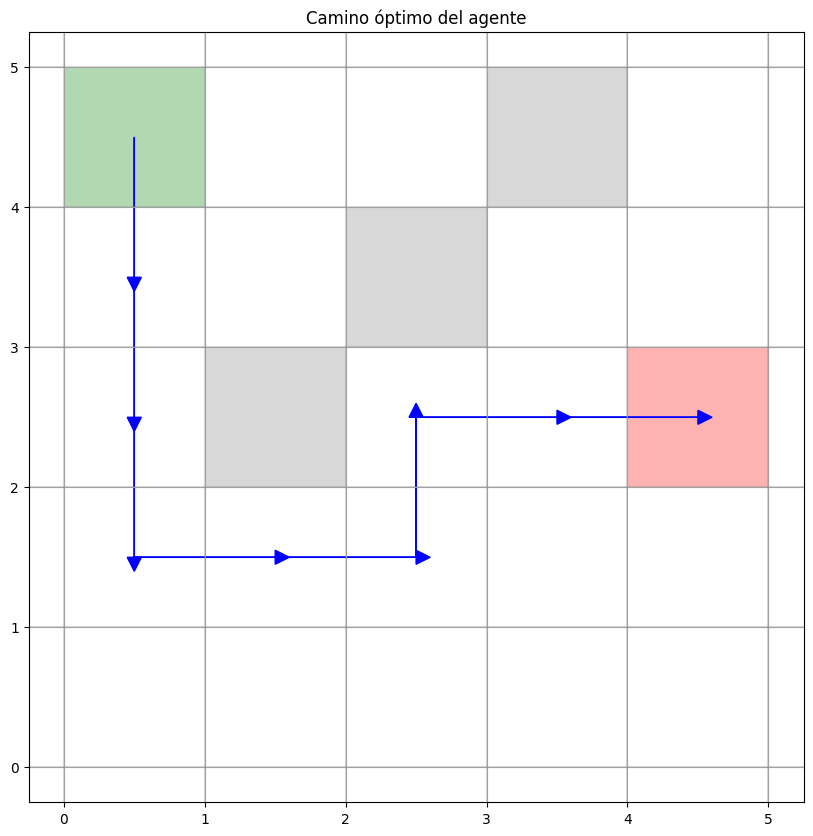

In [34]:
# Visualizar el camino
visualize_q_learning_path(path)

Nuestro agente sabe cómo navegar la cuadrícula y llegar a la meta mientras evita los obstáculos. Este ejemplo es simple, pero revela algo poderoso: la capacidad de aprender del entorno y adaptarse con el tiempo.

Si nos paramos a pensar, ¿no es esto similar a nuestras propias vidas? Estamos constantemente explorando caminos, cometiendo errores, encontrando recompensas y aprendiendo. Somos como agentes en nuestro propio entorno, nuestro mundo. siempre buscando nuestro próximo movimiento óptimo.

Pero, al igual que nuestro agente en la cuadrícula, hay un límite en lo que podemos hacer con un entorno tan simple. El mundo es vasto, dinámico y lleno de complejidades. ¿Cómo sería si pudiéramos entrenar a nuestros agentes para enfrentarse a entornos que simulen ese dinamismo? ¿Qué secretos podrían desentrañar?

Con esta pregunta en mente, nos adentramos en **OpenAI Gym**, donde los agentes no solo aprenden, sino que se enfrentan a desafíos más reales y emocionantes. ¿Listo para aplicar lo que hemos aprendido?

# 3. OpenAI Gym y el problema de Cartpole

## 3.1. Introducción a OpenAI Gym

OpenAI Gym es una biblioteca que nos proporciona una colección de entornos de simulación listos para usar. Desde juegos simples hasta problemas complejos de robótica, es una herramienta esencial para experimentar con el aprendizaje por refuerzo.

Un ejemplo clásico que exploraremos aquí es CartPole: en este entorno, el agente controla un carrito sobre una pista y su objetivo es mantener un palo en equilibrio el mayor tiempo posible. Si el palo se inclina demasiado o el carrito sale de los límites de la pista, el episodio termina.

## 3.2. Configuración del entorno CartPole

Primero, configuramos el entorno de OpenAI Gym y exploramos sus propiedades.

In [35]:
# Crear el entorno CartPole
env = gym.make("CartPole-v1")

# Observar el espacio de estados y acciones
print("Espacio de observación:", env.observation_space)
print("Espacio de acciones:", env.action_space)

# Reiniciar el entorno para obtener el estado inicial
state = env.reset()
print("Estado inicial:", state)


Espacio de observación: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
Espacio de acciones: Discrete(2)
Estado inicial: (array([ 0.02896225,  0.00799498, -0.03906671, -0.00786497], dtype=float32), {})


Aquí podemos ver tres elementos importantes:

- **Espacio de observación**: El espacio de observación nos dice qué información puede "ver" el agente:
    - Posición del carrito.
    - Velocidad del carrito.
    - Ángulo del palo.
    - Velocidad angular del palo.
- **Espacio de acciones**: En CartPole, el agente puede tomar dos acciones:
    - Mover el carrito a la izquierda (acción 0).
    - Mover el carrito a la derecha (acción 1).
- **Estado inicial**: Cuando reiniciamos el entorno, obtenemos un estado inicial que describe la posición y velocidad del carrito y el palo.

Estos datos son el "mundo" que el agente puede percibir. Para tomar decisiones, necesita interpretar esta información y aprender cómo afecta sus acciones al equilibrio.

### Visualización del entorno

Vamos a visualizar CartPole en acción para entender mejor cómo se comporta.

In [47]:
def simulate_and_render(env, policy=None, max_steps=200, gif_name='GIF_CartPole.gif', display_gif=True, use_discretization=True, bins=20):
    """
    Simula un episodio y genera un GIF de la simulación.
    
    Args:
        env: Entorno de gymnasium
        policy: Función que toma un estado y devuelve una acción. Si es None, usa acciones aleatorias
        max_steps: Número máximo de pasos en la simulación
        gif_name: Nombre del archivo GIF resultante
        display_gif: Si True, muestra el GIF por pantalla
    
    Returns:
        reward_total: Recompensa total del episodio
    """
    # Detectar si estamos en Colab
    in_colab = 'google.colab' in str(get_ipython())
    
    # Definir la ruta de guardado
    if in_colab:
        save_path = gif_name
    else:
        save_path = f'../docs/imgs/{gif_name}'
        os.makedirs('../docs/imgs', exist_ok=True)
    
    # Inicializar entorno
    state = env.reset()[0]
    frames = []
    reward_total = 0
    
    # Simulación y captura de frames
    for _ in range(max_steps):
        # Renderizar y guardar frame
        frame = env.render()
        frames.append(PIL.Image.fromarray(frame))
        
        # Seleccionar acción
        if policy is None:
            action = env.action_space.sample()
        else:
            try:
                if use_discretization:
                    state_discrete = discretize(state, bins)
                    action = np.argmax(policy[state_discrete])
                else:
                    action = np.argmax(policy[state])
            except Exception:
                print(f"Usando acción aleatoria debido a: {e}")
                action = env.action_space.sample()
        
        # Ejecutar acción
        state, reward, terminated, truncated, info = env.step(action)
        reward_total += reward
        
        if terminated or truncated:
            break
    
    env.close()
    
    # Guardar GIF
    frames[0].save(save_path, save_all=True, append_images=frames[1:], duration=50, loop=0)
    
    # Mostrar GIF solo si display_gif es True
    if display_gif:
        display.clear_output(wait=True)
        return display.Image(save_path), reward_total
    
    return reward_total

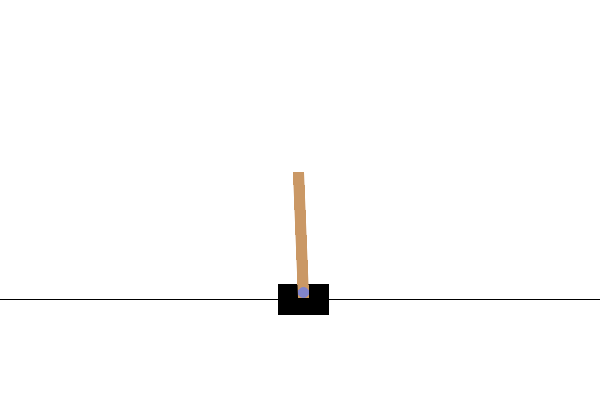

Recompensa con política aleatoria: 48.0


In [51]:
# Crear el entorno
env = gym.make("CartPole-v1", render_mode="rgb_array")

# Ejecutar y mostrar Gif sólo si display_gif es True

display_gif = True

if display_gif:
    gif, reward = simulate_and_render(
        env,
        policy=None,  # Al ser None, usará acciones aleatorias
        gif_name='GIF_CartPole_Random.gif',
        display_gif=True
    ) 
    display.display(gif)
else:
    reward = simulate_and_render(
        env,
        policy=None,  # Al ser None, usará acciones aleatorias
        gif_name='GIF_CartPole_Random.gif',
        display_gif=False
    )
print(f"Recompensa con política aleatoria: {reward}")

![GIF_CartPole](../docs/imgs/GIF_CartPole.gif)

Como puedes observar, el carrito intenta mantener el palo en equilibrio el mayor tiempo posible, moviéndose de un lado a otro para evitar que se caiga o que salga de los límites de la pista. Sin embargo, cuando el palo supera un cierto ángulo de inclinación o el carrito se desplaza demasiado lejos, el episodio termina y el entorno se reinicia automáticamente.

En particular, el entorno se reinicia cuando:
- El palo se inclina más de 12 grados.
- El carrito se desplaza más de 2.4 unidades de distancia del centro.

Estos criterios están predefinidos en OpenAI Gym para simplificar el problema y permitir que el agente pueda enfocarse en estrategias claras para maximizar su recompensa dentro de un marco limitado.

## 3.3. Implementación de Q-Learning para CartPole

Para CartPole, necesitamos ajustar el enfoque de Q-Learning. Esto se debe a que:

1. A diferencia de nuestra cuadrícula anterior, CartPole tiene un espacio continuo para las observaciones (valores como posición o ángulo). Esto significa que el agente podría enfrentarse a infinitos estados posibles.
2. Cada acción afecta no solo al presente, sino también a las posibilidades futuras. Si mueves el carrito en la dirección equivocada, el palo podría caer más rápido.

Para manejar esto, nuestro primer paso será discretizar el espacio de observación.

### ¿Qué es discretizar?

**Discretizar** significa dividir el espacio continuo en categorías o bins manejables, en otras palabras, reducir el número de estados posibles.

Por ejemplo, supongamos que tenemos un termómetro que mide temperaturas entre 0.00°C y 100.00°C. Este es un espacio continuo porque el termómetro puede mostrar cualquier valor decimal, como 22.37°C o 89.56°C. Sin embargo, si lo dividimos en 10 rangos (bins), podríamos agrupar las temperaturas así:

Bin 0: 0-10°C
Bin 1: 10-20°C
Bin 2: 20-30°C
...
Bin 9: 90-100°C

De esta forma, si la temperatura es 22.37°C, cae en el Bin 2 (20-30°C). Esto simplifica las decisiones, ya que en lugar de considerar infinitos valores, sólo tenemos que trabajar con 10 categorías discretas.

Básicamente, buscamos conseguir:
1. Simplificar el problema acotando el número de estados posibles para poder dibujarlos en una tabla Q.
2. Reducir la complejidad computacional (cantidad de información a procesar por parte del agente).

In [37]:
# Definir los límites del espacio de observación
min_space = env.observation_space.low
max_space = env.observation_space.high

# Limitar valores extremos para estabilidad
min_space[1] = -3.4  # Velocidad del carrito
max_space[1] = 3.4
min_space[3] = -3.4  # Velocidad angular del palo
max_space[3] = 3.4

# Dividir cada dimensión en bins
bins = 20

# Función para discretizar un estado continuo
def discretize(state, bins):
    """Convierte un estado continuo en uno discreto usando bins."""
    # Usamos ranges en lugar de range para evitar conflicto con la función built-in
    ranges = [np.linspace(min_space[i], max_space[i], bins) for i in range(len(state))]
    return tuple(np.digitize(state[i], ranges[i]) - 1 for i in range(len(state)))

# Probar la discretización
state_continuous = env.reset()[0]
state_discrete = discretize(state_continuous, bins)
print("Estado continuo:", state_continuous)
print("Estado discreto:", state_discrete)


Estado continuo: [-0.01019952 -0.0300509   0.04868056  0.03758897]
Estado discreto: (np.int64(9), np.int64(9), np.int64(10), np.int64(9))


Ahora, cada estado continuo se ha convertido en un estado discreto con 20 categorías para cada variable. Esto simplifica enormemente el algoritmo, pero no sacrifica la capacidad de aprendizaje del agente.

### Inicialización de la tabla Q

La tabla Q es donde almacenaremos lo aprendido. Representa las estimaciones del agente sobre la calidad de cada acción en cada estado discreto.

In [38]:
# Dimensiones de la tabla Q
dimensions = (bins,) * len(min_space) + (env.action_space.n,)

# Crear la tabla Q llena de ceros
q_table = np.zeros(dimensions)
print("Dimensiones de la tabla Q:", q_table.shape)


Dimensiones de la tabla Q: (20, 20, 20, 20, 2)


En este output podemos ver cómo está organizada la tabla Q. Cada número representa una dimensión del espacio de estados y acciones:

- **(20, 20, 20, 20)**: Estas cuatro primeras dimensiones corresponden a las características del entorno discretizadas en 20 categorías (bins) cada una:
    - Posición del carrito.
    - Velocidad del carrito.
    - Ángulo del palo.
    - Velocidad angular del palo.

Juntas, forman todas las posibles combinaciones de estados discretos del entorno. En este caso hay $20^4 = 160.000$ estados posibles.

- **(2)**: La última dimensión representa las dos acciones posibles:
    - Mover el carrito a la izquierda.
    - Mover el carrito a la derecha.

Estas dos acciones son las que el agente puede tomar para interactuar con el entorno.

En definitiva, nuestra tabla Q almacena dos valores (uno para cada acción) para cada una de las $160.000$ combinaciones de estados posibles.

> **Nota**: Aunque esta tabla es manejable para este problema, en entornos más complejos, necesitaríamos métodos más avanzados como redes neuronales para estimar los valores Q.

### 3.3.1. Entrenamiento del agente

Finalmente, entrenaremos al agente para que aprenda a maximizar la duración del equilibrio del palo. Utilizaremos exploración (epsilon-greedy) al principio y, poco a poco, dejaremos que el agente confíe más en lo aprendido (explotación).

In [39]:
# Parámetros de entrenamiento
alpha = 0.5  # Tasa de aprendizaje
gamma = 0.95  # Factor de descuento
epsilon = 1.0  # Probabilidad de exploración
epsilon_decay = 0.999  # Decadencia de epsilon
epsilon_min = 0.2  # Valor mínimo de epsilon

# Entrenamiento
episodes = 5000
rewards = []

for episode in range(episodes):
    state_continuous = env.reset()[0]
    state = discretize(state_continuous, bins)
    reward_total = 0
    terminated = False

    while not terminated:
        # Elegir acción con epsilon-greedy
        if np.random.rand() < epsilon:
            action = np.random.choice(env.action_space.n)  # Exploración
        else:
            action = np.argmax(q_table[state])  # Explotación

        # Tomar acción y observar resultado
        new_state_continuous, reward, terminated, truncated, info = env.step(action)
        new_state = discretize(new_state_continuous, bins)

        # Actualizar la tabla Q
        max_q = np.max(q_table[new_state])
        q_table[state][action] += alpha * (reward + gamma * max_q - q_table[state][action])

        # Cambiar al nuevo estado
        state = new_state
        reward_total += reward

    # Reducir epsilon
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Guardar recompensa del episodio
    rewards.append(reward_total)

    if (episode + 1) % 500 == 0:
        print(f"Episode {episode + 1}/{episodes}, average reward: {np.mean(rewards[-500:])}")


Episode 500/5000, average reward: 30.002
Episode 1000/5000, average reward: 56.188
Episode 1500/5000, average reward: 84.524
Episode 2000/5000, average reward: 100.07
Episode 2500/5000, average reward: 121.33
Episode 3000/5000, average reward: 126.098
Episode 3500/5000, average reward: 127.83
Episode 4000/5000, average reward: 131.196
Episode 4500/5000, average reward: 135.658
Episode 5000/5000, average reward: 146.712


#### Análisis de los resultados

- **Mejora Continua**: Como vemos, la recompensa cada vez aumenta más, lo que indica que el agente está aprendiendo. Hacia los episodios intermedios (alrededor de 2.000), la recompensa supera los 100, lo que significa que el agente ha aprendido estrategias que mantienen el palo equilibrado más tiempo.
- **Convergencia**: El aumento de la recompensa hacia los últimos episodios hasta alcanzar 147 aproximadamente en el episodio final, sugiere que el agente converge hacia una política efectiva y está maximizando su recompensa en la mayoría de las ocasiones.

En definitiva, el agente ha aprendido con éxito: Las recompensas son crecientes y su estabilización sugieren que el agente ha adquirido una política efectiva para equilibrar el palo.

Sin embargo, aunque vemos que el agente está aprendiendo, la recompensa máxima en CartPole es 500, es decir, que todavía queda bastante margen para mejorar.

#### Posibles pasos para mejorar el rendimiento


- **Aumentar los episodios de entrenamiento**: Entrenar por más tiempo podría permitir que el agente refine aún más su política y alcance recompensas más altas. Además, por ahora hemos visto que la recompensa acumulada del agente sigue subiendo, lo que sugiere que todavía no ha convergido.
- **Explorar `epsilon_decay` dinámico**: En lugar de disminuir `epsilon` linealmente, podríamos usar un enfoque dinámico que reduzca más rápido al principio y más lento hacia el final para equilibrar exploración y explotación.
- **Probar estrategias avanzadas**: Otra posibilidad sería introducir métodos más sofisticados como **Double Q-Learning** o **Deep Q-Learning (DQN)** que pueden llevar al agente a dominar completamente el problema.
- **Visualizar el comportamiento del agente**: Simular episodios después del entrenamiento para observar cómo el agente toma decisiones. Esto puede revelar si hay áreas específicas donde su política aún necesita mejoras.

#### Visualización de la evolución del agente

Ahora vamos a visualizar el progreso y comportamiento del agente.

Primero vamos a graficar las recompensas acumuladas:


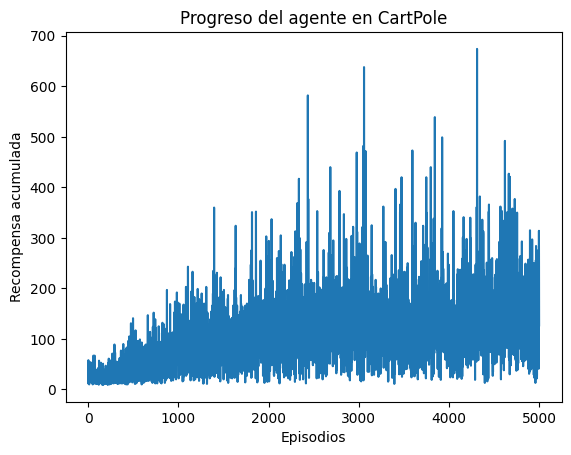

In [42]:
plt.plot(rewards)
plt.xlabel("Episodios")
plt.ylabel("Recompensa acumulada")
plt.title("Progreso del agente en CartPole")
plt.show()

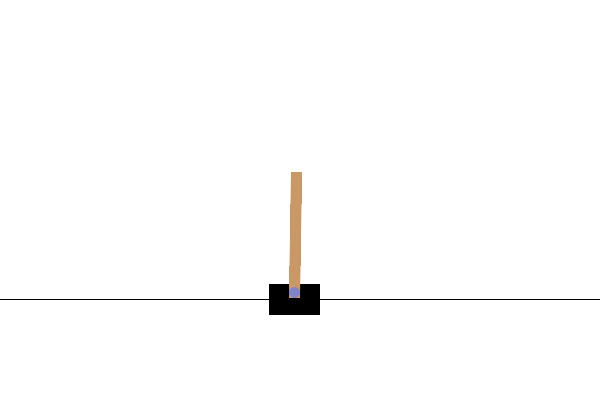

Recompensa total del episodio: 179.0


In [53]:
# Ejemplo de uso:
env = gym.make("CartPole-v1", render_mode="rgb_array")

display_gif = True # Cambiar a True para mostrar el Gif generado

if display_gif:
    # Mostrando el GIF
    gif, reward = simulate_and_render(
        env,
        policy=q_table,
        display_gif=True,
        gif_name='GIF_CartPole_Q-Learning.gif'
    )
    display.display(gif)  # Mostrar explícitamente el GIF
else:
    reward = simulate_and_render(
        env,
        policy=q_table,
        display_gif=False,
        gif_name='GIF_CartPole_Q-Learning.gif'
    )
print(f"Recompensa total del episodio: {reward}")

![GIF_CartPole_Q-Learning](../docs/imgs/GIF_CartPole_Q-Learning.gif)